In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


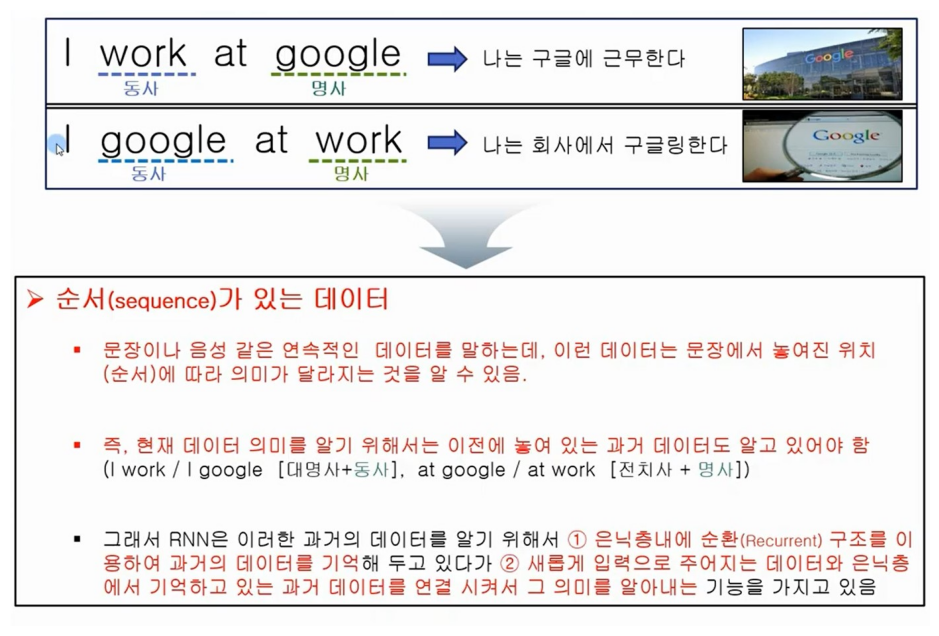

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
image = mpimg.imread('/content/drive/MyDrive/KITA_2024/M6_DeepLearning/DATA/KakaoTalk_20240809_112449506_04.jpg')
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

[ RNN 활성화 함수 ]
- tanh는 일반적으로 전통적인 RNN에서 선호되며, 출력 범위와 0 중심화 특성 때문에 시퀀스 데이터를 처리하는 데 유리할 수 있다. 반면, ReLU는 그라디언트 소실 문제를 완화하고 계산 효율성이 뛰어나기 때문에, 깊은 RNN이나 변형된 RNN 구조(예: LSTM, GRU)에서 선호될 수 있다.
- tanh 함수가 학습 과정에서 가중치 업데이트를 더 효율적으로 만들고, 그라디언트 소실 문제를 완화하는 데 도움이 되는 이유는 tanh 함수의 출력이 -1과 1 사이이고 0을 중심으로 하기 때문에, 신경망은 양의 방향과 음의 방향 모두에서 가중치를 조정할 수 있어 학습 과정이 더 균형 잡히고 효율적으로 진행

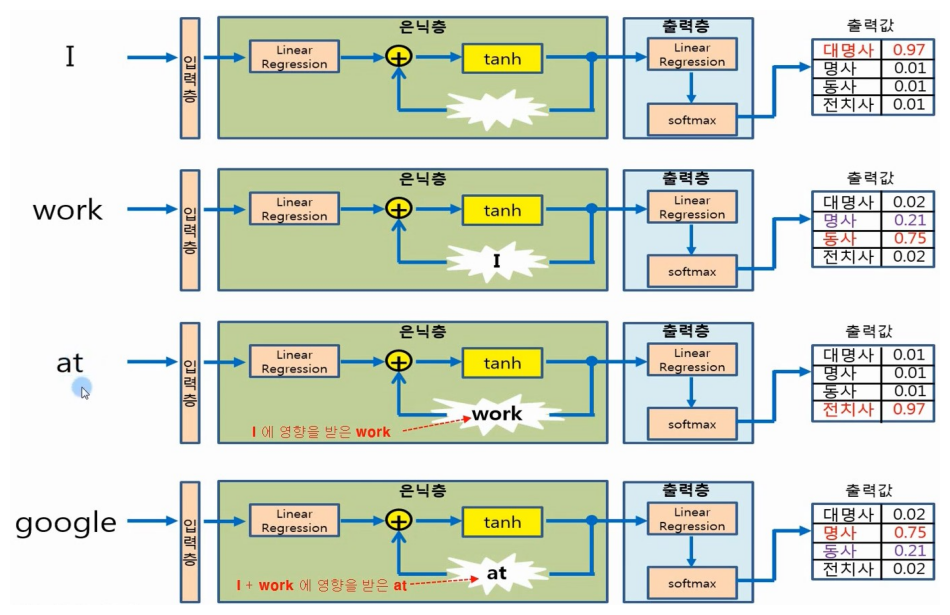

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
image = mpimg.imread('/content/drive/MyDrive/KITA_2024/M6_DeepLearning/DATA/KakaoTalk_20240809_112449506_03.jpg')
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

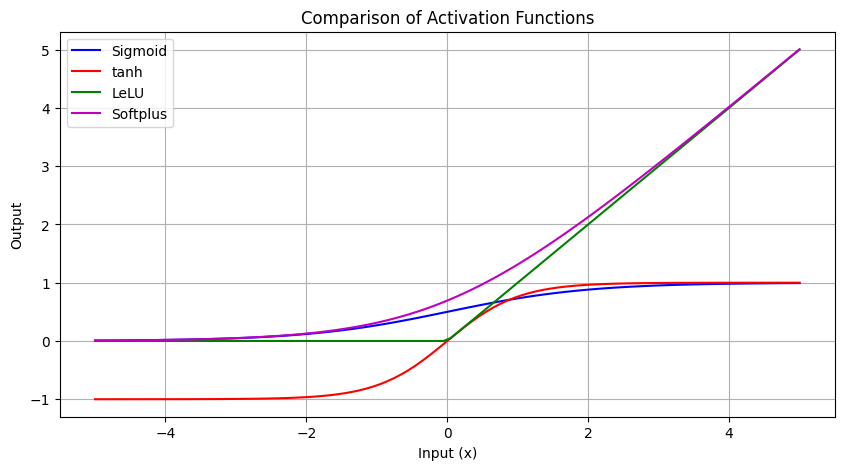

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace

# Define functions
x = linspace(-5, 5, 100)
y1 = 1 / (1 + np.exp(-x))  # Sigmoid
y2 = np.tanh(x)            # tanh
y3 = np.maximum(0, x)      # LeLU
y4 = np.log(1 + np.exp(x)) # Softplus (used instead of softmax for this comparison)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x, y1, 'b', label='Sigmoid')
plt.plot(x, y2, 'r', label='tanh')
plt.plot(x, y3, 'g', label='LeLU')
plt.plot(x, y4, 'm', label='Softplus')
plt.legend()
plt.title("Comparison of Activation Functions")
plt.xlabel("Input (x)")
plt.ylabel("Output")
plt.grid(True)
plt.show()

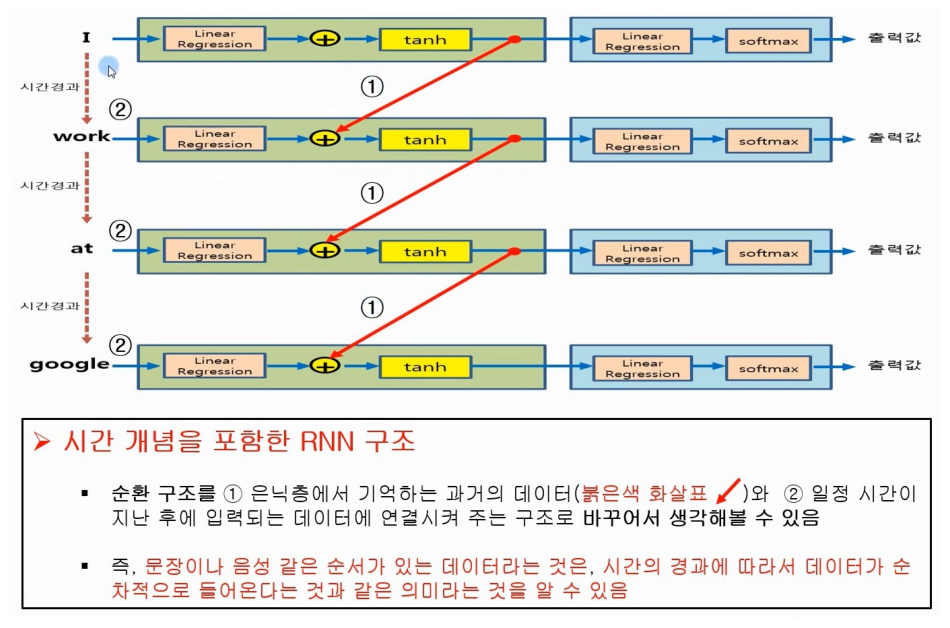

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
image = mpimg.imread('/content/drive/MyDrive/KITA_2024/M6_DeepLearning/DATA/KakaoTalk_20240809_112449506_02.jpg')
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

[ RNN의 동작원리 ]
- 순환 신경망(RNN)에서 현재 입력 데이터에 대한 상태를 계산하는 과정은 현재 입력과 네트워크의 이전 상태(또는 숨겨진 상태)의 조합을 통해 이루어진다. 이 계산은 RNN이 시퀀스의 이전 입력에 대한 메모리를 유지할 수 있는 기본적인 능력과 관련이 있다.
- 처음에는 어떤 입력도 처리하기 전에, 숨겨진 상태(일반적으로 $ℎ_{0}$ 로 표시됨)는 보통 0의 벡터로 초기화
- RNN은 시퀀스 데이터를 한 요소씩 순차적으로 처리
- 시간 단계 t에서 현재 입력 데이터의 상태는 $ℎ_{t}$로 표시되며 현재 입력 $A_{1}$ 와 이전 상태 $ℎ_{t-1}$의 함수를 사용하여 계산됩니다. 이는 다음과 같은 공식으로 나타낼 수 있다:
$$ h_t = f(A_{1}W_{ih} + h_{t-1}W_{hh}  + b_{hh}) $$

- $ℎ_{t}$ : 현재 숨겨진 상태.
- $f$ : 활성화 함수, 예를 들어 tanh 또는 ReLU 같은 것이 요소별로 적용. 활성화 함수의 선택은 모델이 복잡한 패턴을 학습할 수 있도록 도와준다.
- $A_{1}$ : 현재 입력.
- $W_{ih}$ : 현재 입력에서 현재 상태로의 연결에 대한 가중치 행렬.
- $ℎ_{t-1}$ : 이전 숨겨진 상태.
- $W_{hh}$ : 숨겨진 상태에서 현재 상태로의 연결에 대한 가중치 행렬.
- $b_{hh}$ : 바이어스 항.


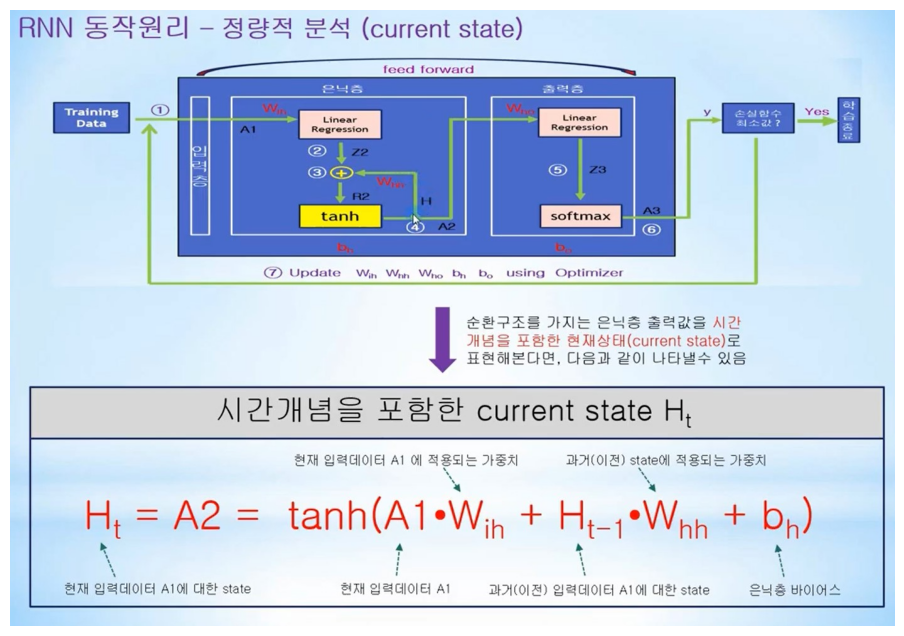

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
image = mpimg.imread('/content/drive/MyDrive/KITA_2024/M6_DeepLearning/DATA/KakaoTalk_20240809_112449506_01.jpg')
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

### 시퀀스 배열로 다루는 순환 신경망(RNN)
- 순환 신경망(RNN)은 텍스트, 숫자 시계열 데이터와 같은 데이터 시퀀스의 패턴을 인식하도록 설계된 인공 신경망 클래스. 피드포워드 신경망과 달리 RNN에는 방향성 주기를 형성하는 연결이 있어 시간이 지나도 정보가 지속될 수 있으며 이 기능을 통해 RNN은 새로운 입력을 처리하는 동안 시퀀스의 이전 입력에 대한 일종의 '메모리'를 유지할 수 있으므로 시퀀스 처리에 특히 적합하다.
- RNN의 핵심 개념:
  - 시간 경과에 따른 메모리: RNN은 지금까지 수행한 계산에 대한 정보를 캡처하는 숨겨진 상태를 유지한다. 숨겨진 상태는 시퀀스의 각 단계에서 업데이트되므로 시간이 지남에 따라 네트워크가 정보를 축적할 수 있다.
  - 순차 처리: RNN은 입력을 순차적으로 처리하여 현재 입력과 이전 입력의 숨겨진 상태에 유지된 정보를 기반으로 결정을 내린다. 이 순차 처리 기능을 통해 RNN은 가변 길이 입력 시퀀스를 처리할 수 있다.
  - 공유 매개변수: 시퀀스의 여러 위치에서 RNN은 계산을 위해 동일한 매개변수(가중치 및 편향)를 공유한다. 이러한 매개변수 공유는 RNN을 시퀀스 처리 작업에 효율적이고 강력하게 만든다.
- RNN의 응용:
RNN은 다음을 포함하여 순차 데이터가 필수적인 다양한 애플리케이션에 사용됩니다.
  - 언어 모델링 및 텍스트 생성: 문장에서 다음 단어를 예측하거나 텍스트를 생성.
  - 음성 인식: 음성 언어를 텍스트로 변환.
  - 기계 번역: 텍스트를 한 언어에서 다른 언어로 번역.
  - 시계열 예측: 시계열의 미래 가치를 예측합니다(예: 주가, 일기 예보).
- RNN의 과제:
  - 그라디언트 베니싱: 훈련 중에 RNN은 그라데이션이 너무 작거나 커져 학습이 매우 느리거나 불안정해지는 그라데이션 소실 문제에 취약. 이러한 문제를 완화하기 위해 그래디언트 클리핑, LSTM(Long Short-Term Memory) 장치 및 GRU(Gated Recurrent Units)와 같은 기술이 개발되었다.
  - 순차 계산: RNN의 본질적인 순차적 특성으로 인해 계산을 완전히 병렬화하기가 어렵고, 이로 인해 더 쉽게 병렬화할 수 있는 아키텍처에 비해 훈련 시간이 길어질 수 있다.
- RNN의 진화:
  - 기존 RNN의 일부 제한 사항을 해결하기 위해 LSTM(Long Short-Term Memory) 및 GRU(Gated Recurrent Units) 네트워크와 같은 변형이 개발되었다. 이러한 아키텍처는 게이트와 같은 메커니즘을 도입하여 정보 흐름을 더 잘 제어하고 네트워크가 그래디언트 소멸 문제를 크게 겪지 않고 더 긴 시퀀스에 대해 정보를 유지할 수 있도록 하여 광범위한 시퀀스 처리 작업에서 RNN의 성능을 크게 향상시킬 수 있다.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 예측할 새로운 텍스트 데이터
new_reviews = [
    "This movie was fantastic! I really enjoyed it.",
    "Terrible movie, I will never watch it again.",
    "It was an average film, nothing special.",
    "Absolutely loved the movie, great acting and story!",
    "Worst movie ever, completely wasted my time."
]

# 이미 학습된 토크나이저로 시퀀스를 변환
word_index = imdb.get_word_index() # 함수는 IMDB 데이터셋에 사용된 단어와 그 단어에 대응하는 인덱스를 매핑한 딕셔너리를 반환
tokenizer = Tokenizer(num_words=10000)
# v + 3은 원래 IMDB 단어 인덱스에서 사용된 정수 인덱스 값에 3을 더한 새로운 인덱스를 생성
tokenizer.word_index = {k: (v + 3) for k, v in word_index.items()} # 특정 예약된 인덱스(예: <PAD>, <START>, <UNK> 등)를 위해 앞부분의 인덱스를 비워두기 위함
tokenizer.word_index["<PAD>"] = 0 # 패딩 토큰을 나타내며, 인덱스 0을 부여
tokenizer.word_index["<START>"] = 1 # 시퀀스의 시작을 나타내는 토큰이며, 인덱스 1을 부여
tokenizer.word_index["<UNK>"] = 2 # 인덱스에 포함되지 않은 단어들을 대체하기 위해 사용됩니다. 인덱스 2를 부여
tokenizer.word_index["<UNUSED>"] = 3 # 사용되지 않는 토큰을 위해 인덱스 3을 부여

sequences = tokenizer.texts_to_sequences(new_reviews)
padded_sequences = pad_sequences(sequences, maxlen=100)

# 예측 수행
predictions = model.predict(padded_sequences)

# 예측 결과 출력
for i, review in enumerate(new_reviews):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}\n")

In [11]:
from keras.datasets import imdb
from keras.layers import Dense, Embedding, SimpleRNN, Input
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential

# 데이터셋 로드
max_features = 10000        # 특성으로 사용할 단어의 수
maxlen = 100                # 시퀀스의 최대 길이(가장 빈번한 feature개의 단어만 사용)

# 데이터셋 로드
print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

# 시퀀스 데이터 패딩
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

model = Sequential()
model.add(Input(shape=(100,)))              # 시퀀스의 길이는 100
model.add(Embedding(10000, 8))              # 임베딩층: 단어 인덱스의 최대값 +1과 임베딩 벡터의 크기
model.add(SimpleRNN(32))                    # 32개의 유닛, RNN 레이어의 출력차원이며, 각 타임스텝에서의 출력 벡터의 크기를 의미
model.add(Dense(1, activation='sigmoid'))   # 출력층: 이진 분류를 위한 시그모이드 활성화 함수

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))
loss, accuracy = model.evaluate(input_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

데이터 로딩...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,345 (317.75 KB)

 Trainable params: 81,345 (317.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.5196 - loss: 0.6849 - val_accuracy: 0.7630 - val_loss: 0.5015
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8055 - loss: 0.4310 - val_accuracy: 0.8062 - val_loss: 0.4158
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8611 - loss: 0.3354 - val_accuracy: 0.8034 - val_loss: 0.4256
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8839 - loss: 0.2925 - val_accuracy: 0.8315 - val_loss: 0.3841
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.8931 - loss: 0.2697 - val_accuracy: 0.8468 - val_loss: 0.3896
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9044 - loss: 0.2447 - val_accuracy: 0.8308 - val_loss: 0.3840
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9166 - loss: 0.2202 - val_accuracy: 0.8300 - val_loss: 0.4548
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9200 - loss: 0.2105 - 

- 1. Input 레이어
  - 노드 수: 100 (입력 시퀀스의 길이)
  - 파라미터 수: 0 (Input 레이어는 단순히 데이터를 입력받는 역할을 하며, 학습할 파라미터가 없습니다.)
- 2. Embedding 레이어
  - 입력: (100,) (각 샘플은 최대 100개의 단어로 이루어짐)
  - 출력: (100, 8) (각 단어가 8차원의 벡터로 임베딩됨)
  - 노드 수: 100 * 8 = 800 (입력된 100개의 단어 각각에 대해 8차원의 벡터가 생성됨)
  - 파라미터 수: 10,000 * 8 = 80,000
  - 어휘 사전의 크기(10,000) * 임베딩 차원(8)
- 3. SimpleRNN 레이어
  - 입력: (100, 8) (임베딩 레이어의 출력)
  - 출력: (32,) (32개의 RNN 유닛, 즉 출력 벡터의 차원)
  - 노드 수: 32 (RNN 유닛 수)
  - 파라미터 수: (8 * 32) + (32 * 32) + 32 = 1,312
  - (8 * 32): 입력 크기(8)와 RNN 유닛 수(32) 간의 가중치
  - (32 * 32): RNN 유닛 내의 가중치 (RNN의 재귀적 연결 가중치)
  - 32: 각 RNN 유닛의 bias
- 4. Dense 레이어
  - 입력: (32,) (RNN 레이어의 출력)
  - 출력: (1,) (이진 분류를 위한 1개의 출력 노드)
  - 노드 수: 1
  - 파라미터 수: 32 * 1 + 1 = 33
  - 32 * 1: 입력 크기(32)와 출력 유닛 수(1) 간의 가중치
  - 1: bias 파라미터
- 요약
  - Input 레이어: 노드 수 = 100, 파라미터 수 = 0
  - Embedding 레이어: 노드 수 = 800100 * 8 = 800 (입력된 100개의 단어 각각에 대해 8차원의 벡터가 생성됨), 파라미터 수 = 80,000
  - SimpleRNN 레이어: 노드 수 = 32, 파라미터 수 = 1,312 ((8 * 32) + (32 * 32) + 32 = 1,312) ==> 입력 크기(8)와 RNN 유닛 수(32), (32 * 32): RNN 유닛 내의 가중치 (RNN의 재귀적 연결 가중치)
  - Dense 레이어: 노드 수 = 1, 파라미터 수 = 33
  - 모델의 총 파라미터 수: 80,000 + 1,312 + 33 = 81,345

In [13]:
(8 * 32) + (32 * 32) + 32

1312